# Imports

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wasserstein_distance
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

## Best geometries

In [14]:
def show(data, figsize, fontsize,showticks, showbar, cmap,fname=None,save=False):
    fig = plt.figure(frameon=False,figsize=figsize)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    g = sns.heatmap(data,xticklabels=showticks, yticklabels=showticks, cbar=showbar, cmap=cmap, vmin= data.max(),vmax = data.min(),linewidths=0,annot=False)
    cbar = g.collections[0].colorbar
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=20)
    ticks = [np.round(data.min()+(data.max()-data.min())*float(i)/5.0,2) for i in range(6)]
    ticks[0]+=0.01
    ticks[-1]-=0.01
    cbar.set_ticks(ticks)
    if save:
        plt.savefig(fname, format='svg', dpi = 1200)

dimension = '2'
origin = '-g'
score = 'isotropy'
simmetry = 'p4'
fontsize = 25
figsize = (7.2,6)

if origin == "-g":
    if os.getcwd().split('\\')[2] == 'lucas':
        score_filename = 'E:/Lucas GAN/Dados/4- Mechanical_scores/GAN/%sD/%s/%s.csv' %(dimension,simmetry,score)
    else:
        score_filename = 'D:/Lucas GAN/Dados/4- Mechanical_scores/GAN/%sD/%s/%s.csv' %(dimension,simmetry,score)
        
else:
    if os.getcwd().split('\\')[2] == 'lucas':
        score_filename = 'E:/Lucas GAN/Dados/4- Mechanical_scores/RTGA/%sD/%s/%s.csv' %(dimension,simmetry,score)
    else:
        score_filename = 'D:/Lucas GAN/Dados/4- Mechanical_scores/RTGA/%sD/%s/%s.csv' %(dimension,simmetry,score)

origins = {'-r':'RTGA','-g':'GAN'}

result_filename = 'C:/Users/lucas/OneDrive/Documentos/GitHub/INT/Manufatura Aditiva/Simulacao-GAN/Pipeline/3- Machine_learning/Analyse/data/%sD/freqs/%s/%s.svg'%(dimension,origins[origin],score)

data = np.loadtxt(score_filename,delimiter=',')
top = int(data.shape[0]*0.25)
# top = 50
order = np.argsort(data[:,-1])[-top:]
top_data = data[order]
top_geoms = top_data[:,1:-1]
idxs_top = top_data[:,0]

freq_geom = []
for i in range(len(top_geoms[0])):
    freq_geom.append(top_geoms[:,i].sum())
freq_geom = np.array(freq_geom)/top
freq_geom = freq_geom.reshape((int(len(freq_geom)**0.5),int(len(freq_geom)**0.5)))
show(freq_geom,figsize,fontsize, False,True,'rocket_r',result_filename,save=True)

OSError: E:/Lucas GAN/Dados/4- Mechanical_scores/GAN/2D/p4/isotropy.csv not found.

idx: 85. score: 1.000000


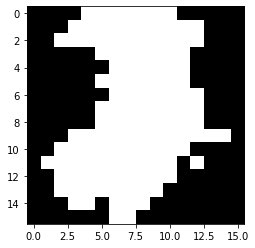

idx: 851. score: 0.999271


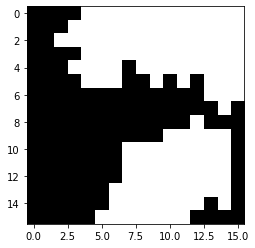

idx: 997. score: 0.998872


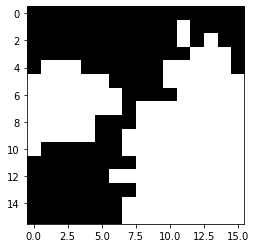

idx: 697. score: 0.998284


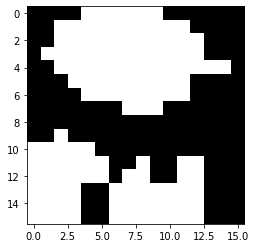

idx: 799. score: 0.997273


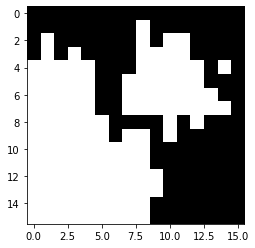

idx: 563. score: 0.996946


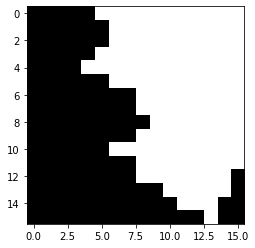

idx: 757. score: 0.995214


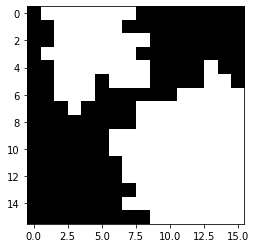

idx: 604. score: 0.995135


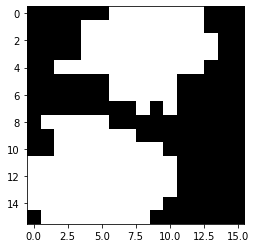

idx: 810. score: 0.991279


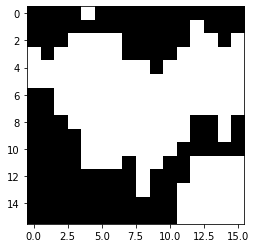

idx: 835. score: 0.991172


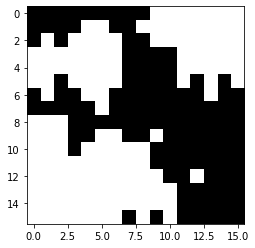

idx: 972. score: 0.988803


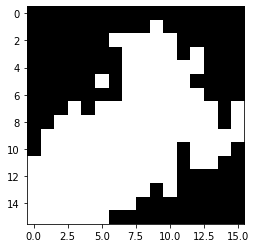

idx: 848. score: 0.987959


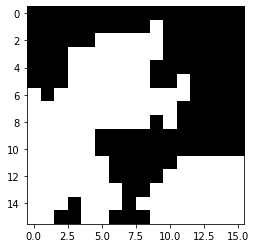

idx: 205. score: 0.987811


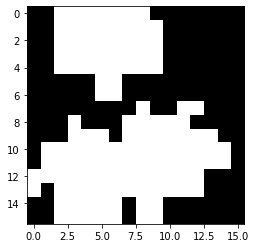

idx: 177. score: 0.986379


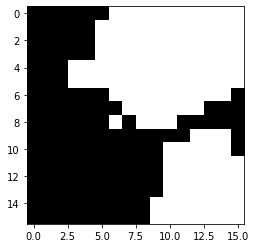

idx: 281. score: 0.986002


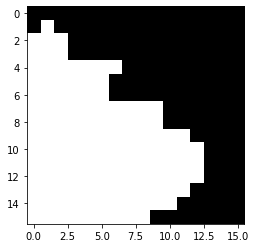

idx: 622. score: 0.980860


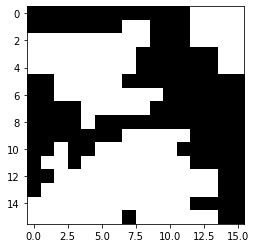

idx: 37. score: 0.977009


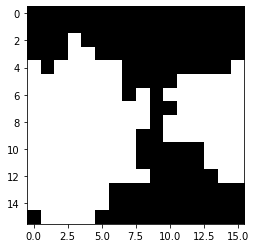

idx: 256. score: 0.976429


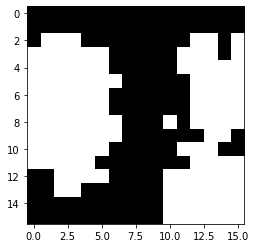

idx: 493. score: 0.975800


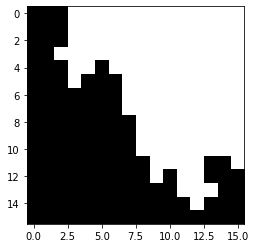

idx: 242. score: 0.975407


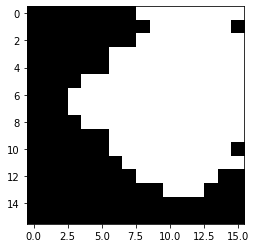

idx: 327. score: 0.975204


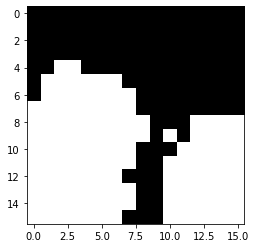

idx: 948. score: 0.974649


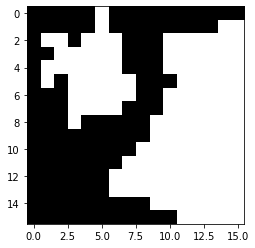

idx: 884. score: 0.972598


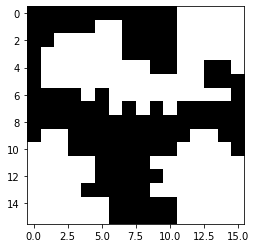

idx: 775. score: 0.972040


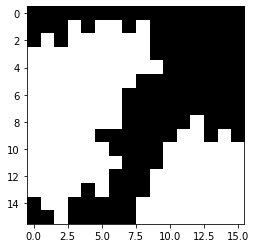

idx: 128. score: 0.970949


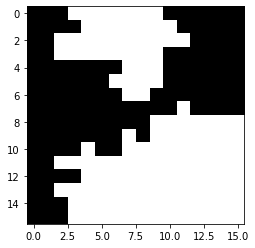

idx: 261. score: 0.969562


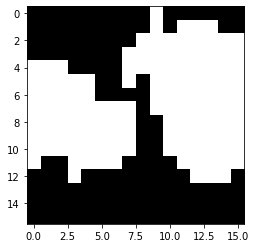

idx: 168. score: 0.968842


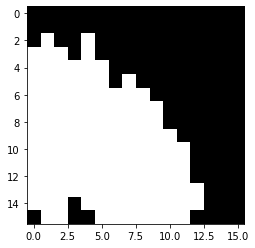

idx: 996. score: 0.967559


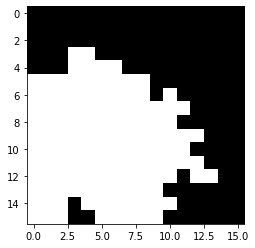

idx: 815. score: 0.967152


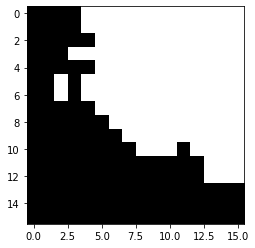

idx: 605. score: 0.966615


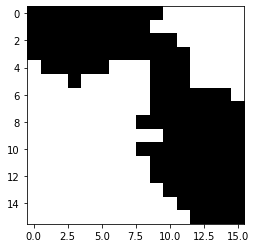

idx: 993. score: 0.966572


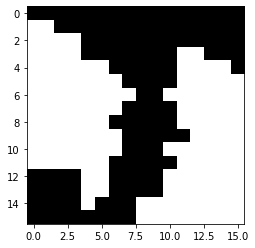

idx: 686. score: 0.965818


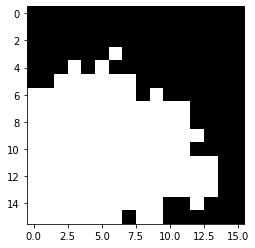

idx: 41. score: 0.965713


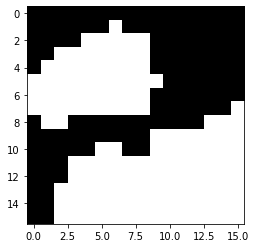

idx: 238. score: 0.964966


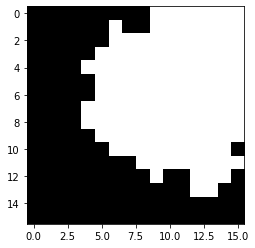

idx: 48. score: 0.961135


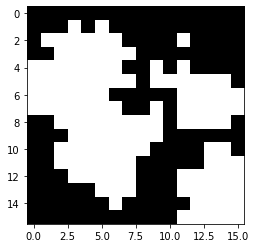

idx: 716. score: 0.959431


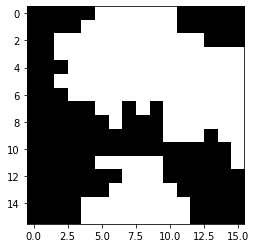

idx: 140. score: 0.959155


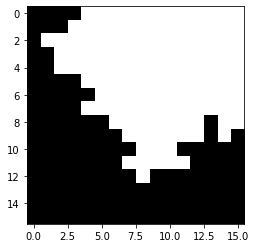

idx: 596. score: 0.958290


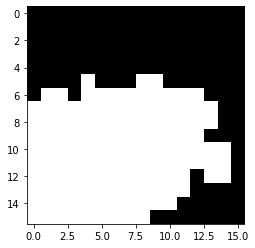

idx: 255. score: 0.956672


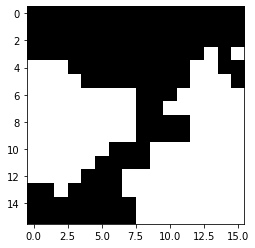

idx: 370. score: 0.956018


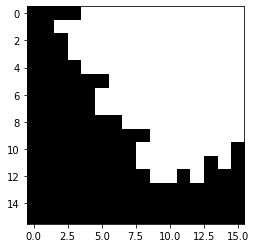

In [5]:
for i in range(40):
    geom = top_data[-i-1,1:-1]
    print("idx: %d. score: %f"%(idxs_top[-i-1]+1,top_data[-i-1,-1]))
    geom = geom.reshape((int(len(geom)**0.5),int(len(geom)**0.5)))
    plt.imshow(geom,cmap='Greys')
    plt.show()
    # show(geom, (6,6), False, False,'Greys','best_hs.png',True)

## Young's moduli histogram

C:\Users\lucas\Anaconda3\envs\deeplearn37\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
C:\Users\lucas\Anaconda3\envs\deeplearn37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\lucas\Anaconda3\envs\deeplearn37\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
C:\Users\lucas\Anaconda3\envs\deeplearn37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


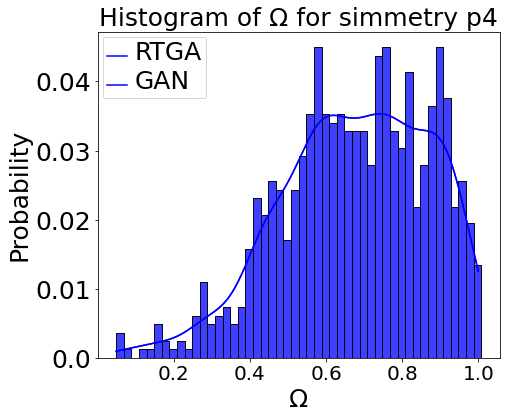

Wasserstein distance: 0.0000


In [9]:
def hist(data,data_g,x_label,fname,fontsize,figsize):
    datas = [data,data_g]
    labels = ['RTGA','GAN']
    colors = ['b','r']
    fig = plt.figure(frameon=False,figsize=figsize)
    for data_ in datas:
        score = data_[:,-1]
        # scaler = MinMaxScaler()
        # score = scaler.fit_transform(score.reshape((score.shape[0],1))).ravel()
        plt.title("Histogram of %s for simmetry %s"%(x_label,simmetry),fontsize=fontsize)
        plt.xlabel(x_label,fontsize=fontsize)
        plt.ylabel("Probability",fontsize=fontsize)
        # plt.axvline(np.mean(score), 0,score.max(), color='g', ls='--')
        # plt.legend()
        g = sns.histplot(score,kde=True,stat='probability',binwidth=0.02,legend=True,color=colors[datas.index(data_)])
        g.set_xticklabels([0.0,0.2,0.4,0.6,0.8,1.0], size = 20)
        g.set_yticklabels(g.get_yticks(), size = fontsize)

    plt.legend(labels=labels)
    plt.setp(g.get_legend().get_texts(), fontsize=fontsize)
    plt.savefig(fname, format='svg', dpi=1200, bbox_inches='tight')
    plt.show()
    print("Wasserstein distance: %.4f"%(wasserstein_distance(data[:,-1],data_g[:,-1])))

dimension = '2'
origin = '-r'
problem = 'isotropy'
simmetry = 'p4'
fontsize = 25
figsize = (7.2,6)

if os.getcwd().split('\\')[2] == 'lucas':
    score_r = 'E:/Lucas GAN/Dados/4- Scores/RTGA/%sD/%s/%s.csv' %(dimension,simmetry,problem)
    score_g = 'E:/Lucas GAN/Dados/4- Scores/GAN/%sD/%s/%s.csv' %(dimension,simmetry,problem)
else:
    score_r = 'D:/Lucas GAN/Dados/4- Scores/RTGA/%sD/%s/%s.csv' %(dimension,simmetry,problem)
    score_g = 'D:/Lucas GAN/Dados/4- Scores/GAN/%sD/%s/%s.csv' %(dimension,simmetry,problem)

x_labels = {'isotropy':'Ω','hs':'HS'}


hist(data,data,x_labels[problem],'hist_%s.svg'%problem,fontsize,figsize)


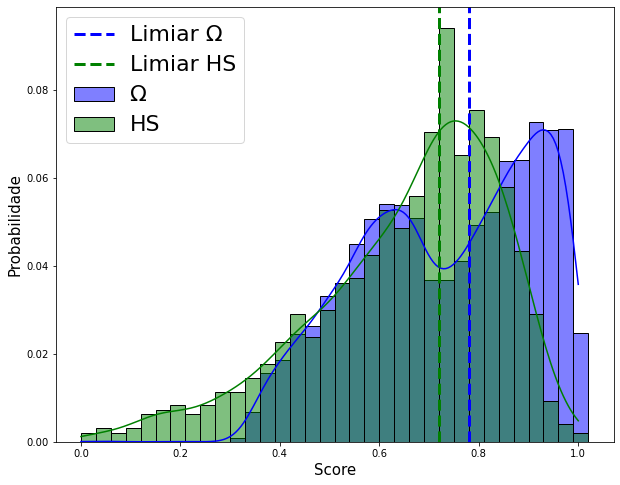

In [12]:
data_iso = np.loadtxt(r'C:\Users\lucas.barbosa\Documents\GitHub\INT\Manufatura Aditiva\Simulacao-GAN\Pipeline\4- Machine_learning\Extraction\data\RTGA\%s\%s.csv'%(simmetry,'isotropy'),delimiter=',')   
data_hs = np.loadtxt(r'C:\Users\lucas.barbosa\Documents\GitHub\INT\Manufatura Aditiva\Simulacao-GAN\Pipeline\4- Machine_learning\Extraction\data\RTGA\%s\%s.csv'%(simmetry,'hs'),delimiter=',')   
datas = [data_iso,data_hs]
colors = ['b','b','g','g']
labels = ['Ω','Limiar Ω','HS','Limiar HS']
fig = plt.figure(frameon=False,figsize=(10,8))
i = 0
cutoffs = [0.78,0.72]

for data_ in datas:
    score = data_[:,-1]
    scaler = MinMaxScaler()
    score = scaler.fit_transform(score.reshape((score.shape[0],1))).ravel()
    plt.xlabel("Score",size=15)
    plt.ylabel("Probabilidade",size=15)
    g = sns.histplot(score,kde=True,stat='probability',legend=True,label=labels[2*i],binwidth=0.03,color=colors[2*i])
    plt.axvline(cutoffs[i], 0,score.max(), color=colors[2*i+1], ls='--',label=labels[2*i+1],linewidth=3)
    i += 1
plt.legend(prop={'size':20})
plt.setp(g.get_legend().get_texts(), fontsize='22')
plt.savefig('hist_hs_iso.png')